#Week 1 Assignment - Math with Python Bridge
## Christian Thieme 
## 12-18-2019

###Chapter 1.  Programming Challenge 1 page 22, Even-Odd Vending Machine

In [0]:
#Even-Odd vending maching 

def vending_machine(num):
  counter = 1
  curr_num = num
  final_list = []
  if num % 2 == 0: 
    print("{0} is an even number.".format(num)) 
    final_list.append(curr_num)
    while counter < 10: 
      curr_num += 1
      if curr_num % 2 == 0:
        final_list.append(curr_num)
        counter += 1
  else: 
    print("{0} is an odd number.".format(num))
    final_list.append(curr_num)
    while counter < 10: 
      curr_num += 1
      if curr_num % 2 != 0:
        final_list.append(curr_num)
        counter += 1
  print(final_list)
    
if __name__ == '__main__':
  while True:
    num = input('Type and integer: ')
    try: 
        int_num = int(num)
        vending_machine(int_num) 
    except: 
      print("Please enter a valid integer - No decimals!")
      

Type and integer: 5
5 is an odd number.
[5, 7, 9, 11, 13, 15, 17, 19, 21, 23]


###Chapter 2.  Programming Challenge 2 page 55, Exploring a Quadratic Function Visually

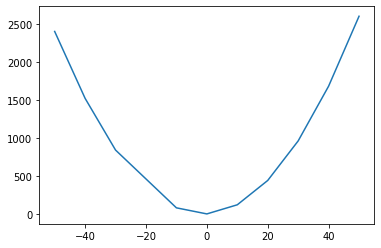

In [0]:
import matplotlib.pyplot as plt

# Quadratic function calculator

def visualize_quadratic():
  x_values = [-50,-40,-30,-10,0,10,20,30,40,50]
  y_values = []
  for x in x_values: 
    y = x**2 + 2*x + 1
    y_values.append(y)
  plt.plot(x_values, y_values)
  plt.show()

visualize_quadratic()


###Chapter 3.  Programming Challenge 2 page 89, Statistics Calculator

In [0]:
#bringing in loaded file and creating dataframe
import pandas as pd
from google.colab import files
import io
from collections import Counter

#calculating the mean
def calculate_mean(numbers):
  s = sum(numbers)
  N = len(numbers)
  mean = s/N
  return mean

#calculating the median
def calculate_median(numbers):
  N = len(numbers)
  numbers.sort()
  if N % 2 == 0:
    m1 = N/2
    m2 = (N/2)+1
    m1 = int(m1) - 1
    m2 = int(m2) - 1
    median = (numbers[m1] + numbers[m2])/2
  else: 
    m = (N+1)/2
    m = int(m) - 1
    median =  numbers[m]
  return median

#calculate mode
def calculate_mode(numbers):
  c = Counter(numbers)
  mode = c.most_common(1)
  return mode[0][0]

def find_differences(numbers):
  mean = calculate_mean(numbers)
  diff = []
  for num in numbers: 
    diff.append(num-mean)
  return diff

def calculate_variance(numbers):
  diff = find_differences(numbers)
  squared_diff = []
  for d in diff: 
    squared_diff.append(d**2)
  sum_squared_diff = sum(squared_diff)
  variance = sum_squared_diff/len(numbers)
  return variance

def statistics_calculator(numbers):
  print("The following list has been loaded: {0}".format(data_list))
  print("The mean of the list is: {0}".format(calculate_mean(numbers)))
  print("The median of the list is: {0}".format(calculate_median(numbers)))
  print("The mode of the list is: {0}".format(calculate_mode(numbers)))
  print("The variance of the list is: {0: .2f}".format(calculate_variance(numbers)))
  print("The standard deviation of the list is: {0: .2f}".format(calculate_variance(numbers)**0.5))

if __name__=='__main__':
  uploaded = files.upload()
  data = pd.read_csv(io.BytesIO(uploaded['mydata.txt']), sep=" ", header = None )
  data.rename(columns= {0:"values"}, inplace = True)
  data_list = data["values"].tolist()
  statistics_calculator(data_list)


Saving mydata.txt to mydata (1).txt
The following list has been loaded: [100, 60, 70, 900, 100, 200, 500, 500, 503, 600, 1000, 1200]
The mean of the list is: 477.75
The median of the list is: 500.0
The mode of the list is: 100
The variance of the list is:  141047.35
The standard deviation of the list is:  375.56


###Chapter 4.  Programming Challenge 4 page 117, Solving Single-Variable Inequalities

In [0]:
# Create a function, isolve(), that will take any inequality and coose the appropriate functions to solve it and return the solutions
from sympy import sympify, Poly, solve_rational_inequalities, solve_poly_inequality, Symbol, solve, solve_univariate_inequality, sin, SympifyError

def isolve(inequality): 
  x = Symbol('x')
  inequal_obj = sympify(inequality)
  left_side = inequal_obj.lhs
  #test for polynomial
  if left_side.is_polynomial(): 
    p = Poly(left_side, x)  
    rel = inequal_obj.rel_op
    return solve_poly_inequality(p,rel)
  #test for relational
  elif left_side.is_rational_function(): 
    numer, denom = left_side.as_numer_denom()
    p1 = Poly(numer)
    p2 = Poly(denom)
    rel = inequal_obj.rel_op
    return solve_rational_inequalities([[((p1,p2), rel)]])
  #Other  
  else:
    return solve_univariate_inequality(inequal_obj, x, relational = False)

if __name__ == "__main__":
  inequal = input("Enter an inequality to be solved:   ")
  try: 
    print(isolve(inequal))
  except (AttributeError, SympifyError, SyntaxError): 
    print("Please enter a valid inequality")
 

Enter an inequality to be solved:   x+3>0
[Interval.open(-3, oo)]


###Chapter 5.  Programming Challenge 2 page 143, Law of Large Numbers

In [0]:
#verifying the law of large numbers: that the greater number of trials you run, the average should move closer to the expected value (E)
import random

e = 1*(1/6) + 2*(1/6)+ 3*(1/6)+ 4*(1/6)+ 5*(1/6)+ 6*(1/6)

def avg_for_x_trials(num):
  list_of_vals = []
  for i in range(1, num + 1):
    rand_num = random.randint(1,6)
    list_of_vals.append(rand_num)
  return sum(list_of_vals)/len(list_of_vals)

print("The expected value: {0}".format(e))
print("The average is {0} for 100 trials.".format(avg_for_x_trials(100)))
print("The average is {0} for 1000 trials.".format(avg_for_x_trials(1000)))
print("The average is {0} for 10,000 trials.".format(avg_for_x_trials(10000)))
print("The average is {0} for 100,000 trials.".format(avg_for_x_trials(100000)))
print("The average is {0} for 500,000 trials.".format(avg_for_x_trials(500000)))
print("Based on the above calculations, we can safely verify that the Law of Large Numbers is correct.")


The expected value: 3.5
The average is 3.4 for 100 trials.
The average is 3.506 for 1000 trials.
The average is 3.5164 for 10,000 trials.
The average is 3.49346 for 100,000 trials.
The average is 3.501762 for 500,000 trials.
Based on the above calculations, we can safely verify that the Law of Large Numbers is correct.


###Chapter 7.  Programming Challenge 2 page 205, Implement the Gradient Descent

Enter a function in one variable:   25*25*sin(2*theta)/9.8
Enter the variable to differentiate with respect to:   theta
Enter the initial value of the variable:  0.1
theta: -0.785360047426147
Minimum value: -63.7755100187720


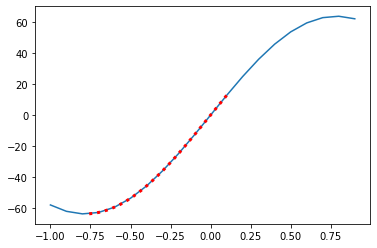

In [61]:
#gradient descent to find the minimum value of a single-variable function

from sympy import Derivative, Symbol, sympify, solve
import matplotlib.pyplot as plt
import numpy as np

def gradient_descent(x0, f1x, x):
  if not solve(f1x):
    print("Cannot continue, solution for {0}=0 does not exist".format(f1x))
    return None
  epsilon = 1e-6 
  step_size = 1e-4
  x_old = x0  #inital starting point
  x_new = x_old - step_size*f1x.subs({x:x_old}).evalf() # initial starting point - step*slope of tangent
  stored_vals = [] #empty list to store values as we move down the curve
  while abs(x_old - x_new) > epsilon: #once slope of tangent nears zero x_old=x_new will get very, very close to zero and will be less than epsilon
    stored_vals.append(x_old)
    x_old = x_new
    x_new = x_old - step_size*f1x.subs({x:x_old}).evalf() #point - step * current slop of tangent ## we are waiting for the slope of the tangent to get near to zero
  return x_new, stored_vals

if __name__=='__main__':
  #user inputs
  f = input("Enter a function in one variable:   ") #entering a function
  var = input("Enter the variable to differentiate with respect to:   ")
  var0 = float(input("Enter the initial value of the variable:  "))
  try:
    f= sympify(f)
  except SympifyError:
    print("Invalid function entered")
  else: 
    var = Symbol(var)
    d = Derivative(f, var).doit() #finding the derivative of the function
    var_min, stored_vals = gradient_descent(var0, d, var) #starting point, derivative , and variable to differentiate by
    print("{0}: {1}".format(var.name, var_min)) #x-value of min
    print("Minimum value: {0}".format(f.subs({var:var_min}))) #y-value of the min
    #Plotting prep
    funtcion_vals = [x for x in np.arange(-1,1,0.1)] #to plot original function
    solved_vals = [f.subs({var:x}) for x in function_vals] #putting each value of the function_vals into the function to graph
    plt.plot(function_vals, solved_vals) #plotting - blue line
    tried_vals = [f.subs({var:x})for x in stored_vals] #taking each tried value and entering to evaluate against original function
    plt.plot(stored_vals, tried_vals, 'r:', linewidth = 3) #red dotted line

    plt.show()
